In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'0.25.1'

In [9]:
!pip install pandas==0.25.1

     |████████████████████████████████| 10.5MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.1 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


In [4]:
# The data set contains the top 1000 baby names in the US for each year from 1880 until 2008
names_df = pd.read_csv('/content/baby-names2.csv')
names_df.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [5]:
# Get popular names for 1980
names_df[names_df.year == 1980].tail()

        year       name      prop   sex soundex
229995  1980    Tatiana  0.000083  girl    T350
229996  1980  Chantelle  0.000083  girl    C534
229997  1980   Julianna  0.000083  girl    J450
229998  1980       Kati  0.000083  girl    K300
229999  1980   Lashunda  0.000083  girl    L253

In [6]:
names_df[names_df.year == 1980].head()

        year         name      prop  sex soundex
100000  1980      Michael  0.037039  boy    M240
100001  1980  Christopher  0.026531  boy    C623
100002  1980        Jason  0.025994  boy    J250
100003  1980        David  0.022600  boy    D130
100004  1980        James  0.021205  boy    J520

In [7]:
# Separating boy names from the girls
boys_df = names_df[names_df.sex == 'boy']
girls_df = names_df[names_df.sex == 'girl']
girls_df.head()

        year       name      prop   sex soundex
129000  1880       Mary  0.072381  girl    M600
129001  1880       Anna  0.026678  girl    A500
129002  1880       Emma  0.020521  girl    E500
129003  1880  Elizabeth  0.019865  girl    E421
129004  1880     Minnie  0.017888  girl    M500

In [8]:

# Get the number of boy baby name rows per year (showing first 5) 
boys_df.groupby('year').size().head()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
dtype: int64

In [10]:
# Get the hierarchical index of baby name rows per year 
# grouped by gender for the year 1969
names_df.groupby(['year', 'sex']).size().loc[1969]

sex
boy     1000
girl    1000
dtype: int64

In [11]:
# Get the most popular boy name for the year 1969
rowid = boys_df[boys_df.year == 1969].prop.idxmax()
boys_df.loc[rowid]

year           1969
name        Michael
prop       0.046564
sex             boy
soundex        M240
Name: 89000, dtype: object

In [12]:

# Apply the get_max_proportion to the whole dataframe
# to get the most popular name for each year (showing first 5)
def get_max_proportion(group):
    return group.loc[group.prop.idxmax()]
    
popular_boys_df = boys_df.groupby('year').apply(get_max_proportion)
popular_boys_df.tail()

      year   name      prop  sex soundex
year                                    
2004  2004  Jacob  0.013196  boy    J210
2005  2005  Jacob  0.012148  boy    J210
2006  2006  Jacob  0.011331  boy    J210
2007  2007  Jacob  0.010948  boy    J210
2008  2008  Jacob  0.010355  boy    J210

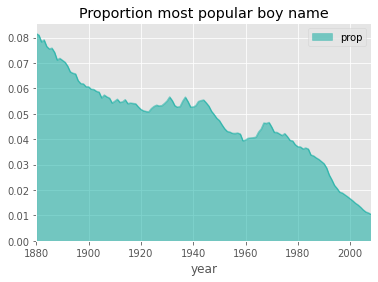

In [13]:
# Plot the proportion of the most popular boy name per year
# Maybe showing more diversity in chosen boy names over time
popular_boys_df.prop.plot(legend=True, title='Proportion most popular boy name', 
                          kind='area', color='#00A99D', alpha=.5)

In [14]:
# Set the index to a name/year combination
boys_index_df = boys_df.set_index(['name', 'year'])
boys_index_df.head()

                  prop  sex soundex
name    year                       
John    1880  0.081541  boy    J500
William 1880  0.080511  boy    W450
James   1880  0.050057  boy    J520
Charles 1880  0.045167  boy    C642
George  1880  0.043292  boy    G620

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


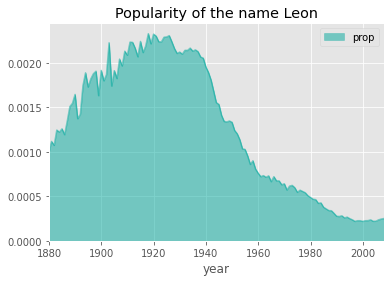

In [16]:
# Popularity of name LEON over time
leon_popularity = boys_index_df.ix['Leon']
leon_popularity.prop.plot(kind='area', color='#00A99D', alpha=.5, 
                          legend=True, title='Popularity of the name Leon')

In [18]:
# WHen was Leon the most popular
boys_index_df.loc['Leon'].prop.idxmax()

1918

In [19]:
# Highest boy name proportion ever...
boys_index_df.prop.idxmax()

('John', 1880)

In [21]:
# Calculate the mean proportion for each girl name in the set
# Show first 5 in descending order
mean_prop = girls_df.groupby('name')['prop'].mean()
mean_prop.sort_values(ascending=False).head()

name
Mary         0.034976
Jennifer     0.011555
Elizabeth    0.010791
Margaret     0.010550
Helen        0.009568
Name: prop, dtype: float64

In [22]:
# Retrieve summary statistics for each year in the data set
result = girls_df.groupby('year').describe()
result.head(24)

        prop                      ...                              
       count      mean       std  ...       50%       75%       max
year                              ...                              
1880  1000.0  0.000935  0.003270  ...  0.000123  0.000400  0.072381
1881  1000.0  0.000933  0.003214  ...  0.000121  0.000407  0.069986
1882  1000.0  0.000931  0.003211  ...  0.000121  0.000406  0.070431
1883  1000.0  0.000933  0.003131  ...  0.000125  0.000433  0.066737
1884  1000.0  0.000931  0.003124  ...  0.000128  0.000443  0.066990
1885  1000.0  0.000930  0.003058  ...  0.000127  0.000465  0.064300
1886  1000.0  0.000930  0.003038  ...  0.000130  0.000449  0.064334
1887  1000.0  0.000928  0.003011  ...  0.000129  0.000452  0.063620
1888  1000.0  0.000928  0.002958  ...  0.000137  0.000455  0.062041
1889  1000.0  0.000928  0.002937  ...  0.000132  0.000461  0.061562
1890  1000.0  0.000928  0.002889  ...  0.000134  0.000491  0.059892
1891  1000.0  0.000927  0.002876  ...  0.000137 

In [23]:
# Get a single year of girl names and sort by proportion descending
girls_df_1972 = girls_df[girls_df.year == 1972]
girls_df_1972_sorted = girls_df_1972.sort_index(by='prop', ascending=False)
girls_df_1972_sorted.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


        year      name      prop   sex soundex
221000  1972  Jennifer  0.039447  girl    J516
221001  1972  Michelle  0.018157  girl    M240
221002  1972      Lisa  0.017086  girl    L200
221003  1972  Kimberly  0.016310  girl    K516
221004  1972       Amy  0.016042  girl    A500

In [24]:
# What is the proportion of this top 1000 girl names of the total names?
girls_df_1972_sorted.prop.cumsum().max()

0.8437470000000009

***Courtesy leonvanbokhorst. In this version, I updated Pandas code for Location (loc/iloc) ***